# Lecture 4


## Importing Packages

We've covered basics of classes, functions, methods.... 

Packages are structured libraries of scripts that provide efficient utilization, and are likely more polished and optimized that whatever we'd write. 



In [1]:
import numpy as np

Structure: 

import is the command :     name of package or file :   alias you want to refer to it in your script

We do not have the pandas package in our current environment, so we need to update our conda environment to include this package. Load up your *requirements.yml* file, and add a line for pandas. Then repeat the process of building the miniconda environment with the new .yml file. 

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy

## Generating Data
Natrually, we need actual data before we can do anything with it. There are several methods to generate data, based on your needs.

Are you working with matrices? 

Are you working with signals? 

Are you working with images? 

Context is important. 

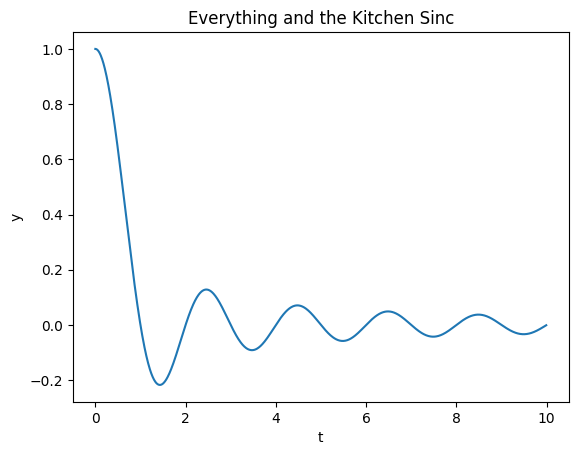

In [5]:
t = np.arange(0, 10, 0.01)
x = np.sinc(t)

plt.figure()
plt.plot(t, x)
plt.title('Everything and the Kitchen Sinc')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

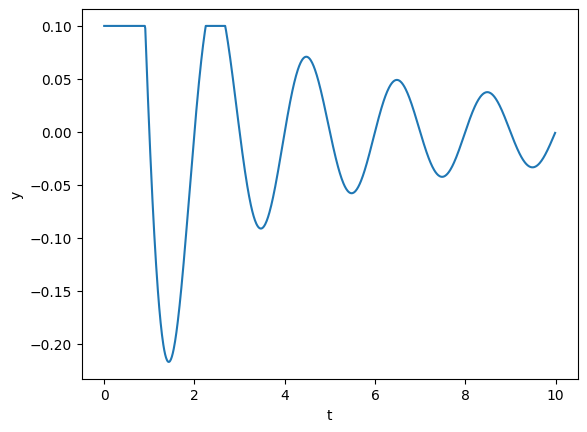

In [6]:
x[x > 0.1] = 0.1
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

### Now for some basic Linear Algebra!

In [7]:
X = np.reshape(x[500:509], (3, 3))
print('X:\n', X)

y = x[:3]
print('y:\n', y)

X:
 [[ 3.89817183e-17 -1.99567967e-03 -3.98144285e-03]
 [-5.95538897e-03 -7.91563637e-03 -9.86032411e-03]
 [-1.17876136e-02 -1.36956904e-02 -1.55827657e-02]]
y:
 [0.1 0.1 0.1]


In [20]:
z = X @ y
z_alt = np.dot(X, y)
z_alt2 = np.matmul(X, y)
assert np.allclose(z, z_alt)
assert np.allclose(z, z_alt2)
print('z:\n', z)



z:
 [-0.00059771 -0.00237313 -0.00410661]


In [21]:
Z = X * y
Z_alt = np.multiply(X, y)
assert np.allclose(Z, Z_alt)
print('Z:\n', Z)



Z:
 [[ 3.89817183e-18 -1.99567967e-04 -3.98144285e-04]
 [-5.95538897e-04 -7.91563637e-04 -9.86032411e-04]
 [-1.17876136e-03 -1.36956904e-03 -1.55827657e-03]]


In [22]:
np.hstack([X, Z])

array([[ 3.89817183e-17, -1.99567967e-03, -3.98144285e-03,
         3.89817183e-18, -1.99567967e-04, -3.98144285e-04],
       [-5.95538897e-03, -7.91563637e-03, -9.86032411e-03,
        -5.95538897e-04, -7.91563637e-04, -9.86032411e-04],
       [-1.17876136e-02, -1.36956904e-02, -1.55827657e-02,
        -1.17876136e-03, -1.36956904e-03, -1.55827657e-03]])

In [10]:
S = np.hstack([X, Z]) @ np.hstack((y, y))
S_alt = np.dot(np.concatenate([X, Z], axis=1), np.concatenate((y, y)))
S_alt2 = np.matmul(np.hstack([X, Z]), np.vstack([y[:, None], y[:, None]]))
assert np.allclose(S, S_alt)
assert np.allclose(S, S_alt2[:, 0])
print('S:\n', S)

S:
 [-0.00065748 -0.00261045 -0.00451727]


### What about Random Signals? 

    https://docs.python.org/3/library/random.html

    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


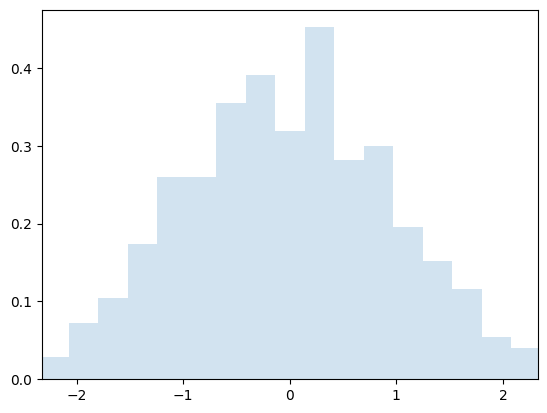

In [23]:
from scipy.stats import norm
from scipy.stats import randint

normal_dist_example = norm.rvs(size = 1000)
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.hist(normal_dist_example, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

In [18]:
import random
random.seed = 42
rando_numbo = random.randint(0, 10)

print(rando_numbo)

4


SEEDING random operators is the key to repeatable results. All random operations for computers are based on pseudo-random number generators, and not truly random. The seed sets the sequence so that you will always generate the same 'random' samples each time you run it. 

Each random function you use: python's random, numpy's random, scipy's random.... will all have individual seeds. If you are trying to set seeds, you need to make sure to set them all. 

## Saving Data

Data format is key here. Knowing what type of data you're trying to save and how it will be used will go a long way. For instance, you *COULD* save everything in binary (.bin) files if you wanted to be crazy. Instead, let's consider various types of files we might want to consider using. 

    - comma separated values (.csv)
    - plain text (.txt)
    - numpy zip (.npz)
    - hierarchical data format 5 (.h5)
    - yet another markup language (.yml)
    - extensible markup language (.xml)
    - portable network graphics (.png)
    - joint photographic experts group (.jpg)
    - tag image format file (.tiff)

Each format has its uses, pros, and cons. For instance, the first half are primarily used for numerical or text data, while th second half are usually for image data (but you can definitely plot random matrices and plots of data as images).  

Most importantly in saving things, is knowing WHAT you're going to save WHERE. Let's use our sinc() function from earlier. 

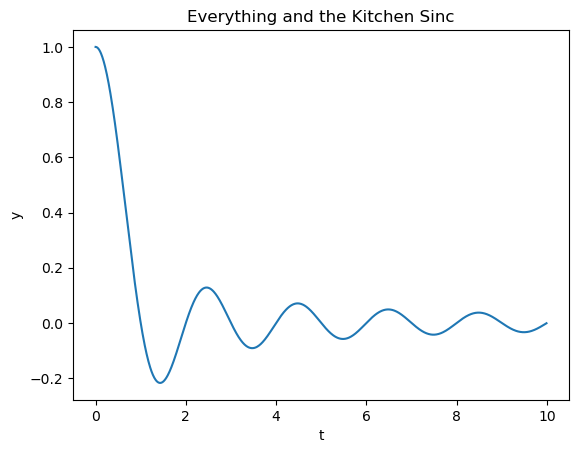

In [50]:
# Saving the data as a .csv
t = np.arange(0, 10, 0.01)
x = np.sinc(t)

plt.figure()
plt.plot(t, x)
plt.title('Everything and the Kitchen Sinc')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

In [15]:
np.savetxt('timeSincData.csv', [t,x], delimiter=',')

In [51]:
np.savez('fulldataZip.npz', t=t, x=x)

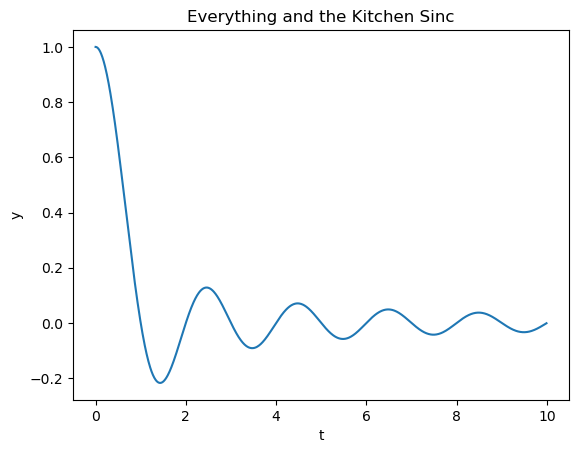

In [19]:
# Saving the figure
plt.figure()
plt.plot(t, x)
plt.title('Everything and the Kitchen Sinc')
plt.xlabel('t')
plt.ylabel('y')
plt.savefig('KitchenSinc.png')

## Loading Data

Just as important as saving data is loading it. We can use the same numpy method for loading raw .csv, .npz, and other numerical or string data if it is formatted well. Loading .xml, .yml and other such hierarchical formats requires more work (which you can look up if you want, but it will likely be covered in other classes). 

In [20]:
t

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [21]:
x

array([ 1.00000000e+00,  9.99835515e-01,  9.99342156e-01,  9.98520217e-01,
        9.97370183e-01,  9.95892735e-01,  9.94088749e-01,  9.91959291e-01,
        9.89505621e-01,  9.86729191e-01,  9.83631643e-01,  9.80214808e-01,
        9.76480704e-01,  9.72431537e-01,  9.68069699e-01,  9.63397762e-01,
        9.58418482e-01,  9.53134795e-01,  9.47549812e-01,  9.41666821e-01,
        9.35489284e-01,  9.29020831e-01,  9.22265262e-01,  9.15226542e-01,
        9.07908797e-01,  9.00316316e-01,  8.92453542e-01,  8.84325071e-01,
        8.75935652e-01,  8.67290180e-01,  8.58393691e-01,  8.49251366e-01,
        8.39868518e-01,  8.30250596e-01,  8.20403175e-01,  8.10331958e-01,
        8.00042767e-01,  7.89541542e-01,  7.78834335e-01,  7.67927309e-01,
        7.56826729e-01,  7.45538960e-01,  7.34070466e-01,  7.22427799e-01,
        7.10617598e-01,  6.98646585e-01,  6.86521560e-01,  6.74249395e-01,
        6.61837030e-01,  6.49291468e-01,  6.36619772e-01,  6.23829058e-01,
        6.10926489e-01,  

In [23]:
t = 0
t

0

In [27]:
x = 0
x

0

In [28]:
x1 = np.loadtxt('sincData.csv')
print(x1.shape)

(1000,)


In [8]:
t,x = np.loadtxt('timeSincData.csv')
print(t.shape)
print(x.shape)

ValueError: could not convert string '0.000000000000000000e+00,1.000000000000000021e-02,2.000000000000000042e-02,2.999999999999999889e-02 to float64 at row 0, column 1.

In [52]:
y = np.load('fulldataZip.npz')

In [53]:
print(y.files)

['t', 'x']


In [54]:
t = y['t']
t.shape

(1000,)

In [48]:
a = np.arange(10)
b = np.arange(20)
np.savez('testStuff.npz', a, b)

In [49]:
npz = np.load('testStuff.npz')
a = npz['arr_0']
print(a)

[0 1 2 3 4 5 6 7 8 9]


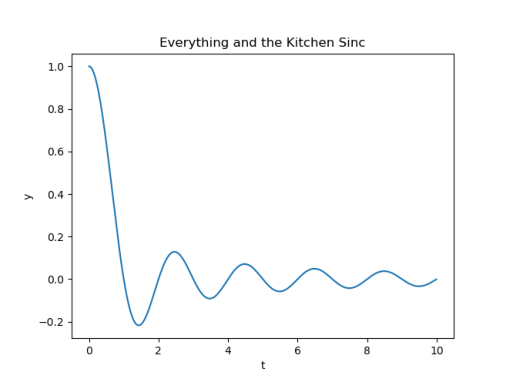

In [60]:
#How about the plot? 
fig_data = plt.imread('KitchenSinc.png', format='png')
img = plt.imshow(fig_data)
plt.axis('off')
plt.show(img)

## Next Week:

Managing Data: 

Dealing with multiple data types, best practices, working with images, building individual scripts and functions. 

Plotting:

The Do's and Don'ts, Understanding what you're seeing/showing, Plots vs. Images vs. Figures vs. Visualized Data

